# AdvStat4Phys exam
Student: Barone Francesco Pio

## EXR 3


In [1]:
# question 1
dbinom(x=5, size=5, prob=0.6)

[1] 0.07776

In [2]:
# question 2
pbinom(q=3, size=5, prob=0.4, lower.tail = TRUE)

[1] 0.91296

In [3]:
# question 3
pbinom(q=1, size=5, prob=0.4, lower.tail = FALSE)
# when lower tail is false it gives P( x>q) without equal sign

[1] 0.66304

## EXR 5

I solve here the question 3.

In [4]:
# doctor 1
prior <- 0.03
for( i in 1:5) {
    post <- (0.95*prior)/((0.95*prior) + (1-0.9)*(1-prior))
    cat(post, ', ')
    prior <- post
}

0.2270916 , 0.7362339 , 0.9636585 , 0.996046 , 0.9995823 , 

In [5]:
# doctor 2
prior <- 0.001
for( i in 1:5) {
    post <- (0.95*prior)/((0.95*prior) + (1-0.9)*(1-prior))
    cat(post, ', ')
    prior <- post
}

0.009419931 , 0.08285518 , 0.4618544 , 0.8907488 , 0.9872539 , 

By the way, the first value is also the result for questions 1 & 2.

## EXR 6

In [6]:
pp <- seq(0,1, 0.005)

numerical_median <- function(distr, p, dp) {
    integral <- 0; i <- 0;
    while(integral < 0.5) { i<- i+1; integral <- integral + dp*distr[i]; }
    return(p[i-1])
}

0.71 0.0071 0.7

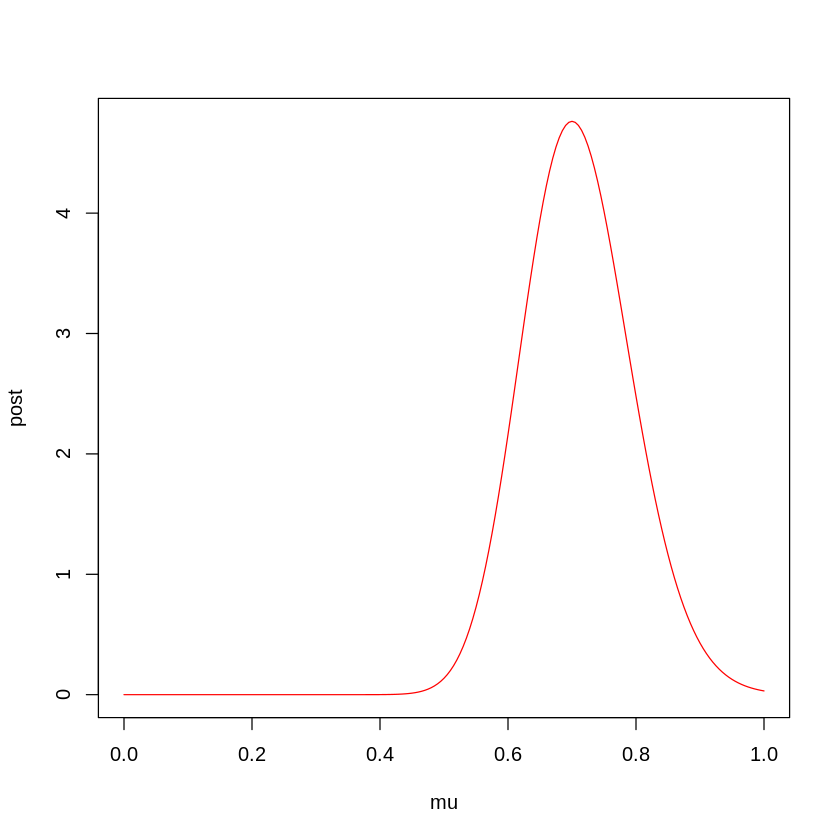

In [7]:
# uniform prior
post.alpha <- 70 + 1 # because of uniform prior
post.lambda <- 100
post <- dgamma(shape = post.alpha, rate = post.lambda,pp)

pmean <- post.alpha/post.lambda
pdev <- post.alpha/(post.lambda^2)
median <- numerical_median(post, pp, 0.005)
cat(paste(pmean, pdev, median))

plot(pp, post, type='l', col='red', xlab='mu')

For Gamma ditribution:
$$mean = a \cdot s$$
$$var = a \cdot s^2 $$
a is shape, s is scale (or rate).
I can invert as:
$$s=\frac{var}{mean}$$
$$a=mean/s$$

0.71 0.0071 0.765

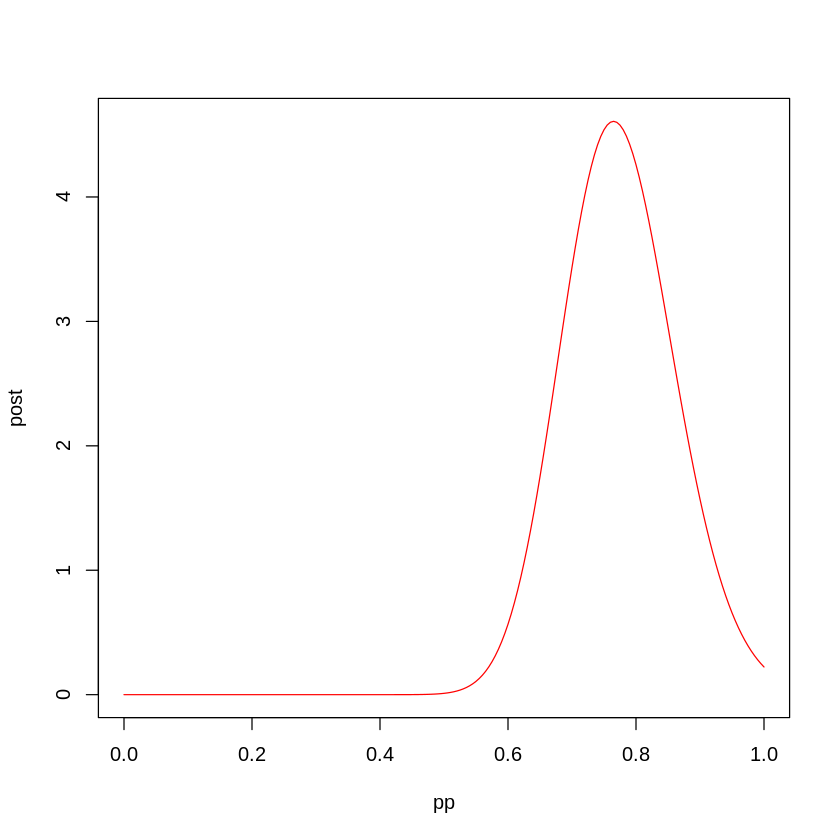

In [8]:
# these are the statistics of prior
gamma.mean <- 6
gamma.std <- 2

# which I use to get the parameters for shape and scale
post.scale <- gamma.std^2/gamma.mean # s
post.shape <- gamma.mean/post.scale  # a
prior <- dgamma(shape = post.shape, rate = post.scale, pp)

# uniform prior
alpha <- 70 # product of gammas
lambda <- 100
likelihood <- dgamma(shape = alpha, rate = lambda, pp)

post <- likelihood*prior
post <- post/sum(post*0.005)

pmean <- post.alpha/post.lambda
pdev <- post.alpha/(post.lambda^2)
median <- numerical_median(post, pp, 0.005)
cat(paste(pmean, pdev, median))

plot(pp, post, type='l', col='red')

**Note**: In each cell I also printed the mean, standard deviation and median, as requested.

## EXR 4

In [13]:
pr1 <- c(8.8, 9.6, 8.9, 9.2, 9.9, 9.4, 9.2, 10.1)
pr2 <- c(9.2, 9.5, 10.2, 9.5, 9.8, 9.5, 9.3, 9.2)

In [14]:
prior.var <- 16
prior.std <- sqrt(prior.var)
prior.mean <- 10
# prior is Norm(10, 1)

In [22]:
pp <- seq(5,15,0.001)

We use the update rules to evaluate the posteriors:

9.38850238518054 0.0261847557366203

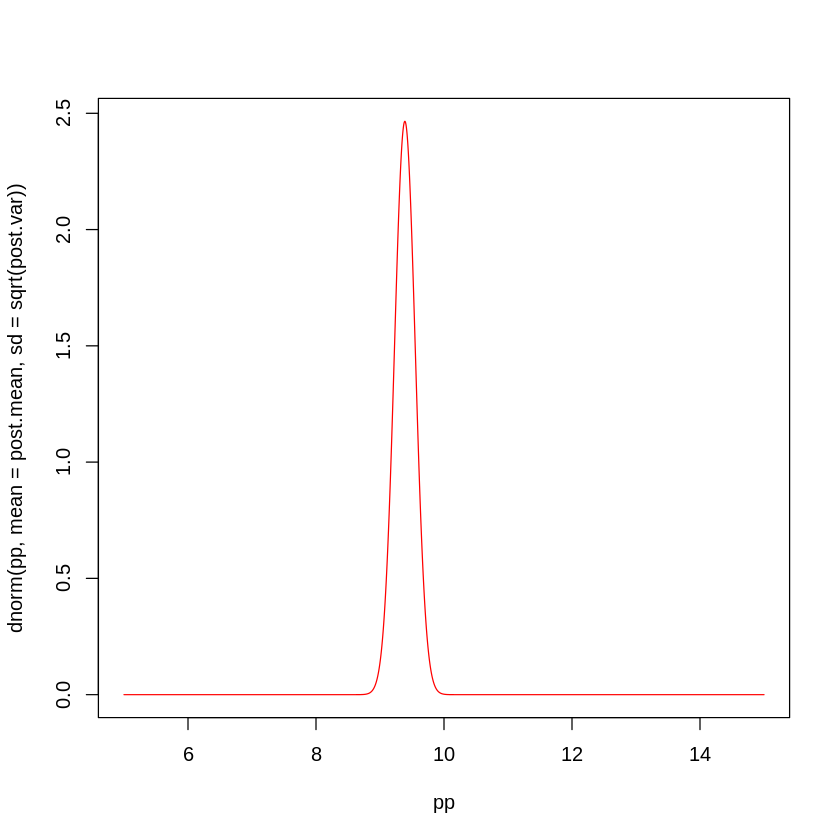

In [26]:
# FIRST DATASET
pc <- pr1 # set the current dataset

n <- length(pc)
pvar <- var(pc)
pmean <- mean(pc)
post.var <- 1/(  prior.var^-1 + n/pvar )
post.mean <- prior.mean*((prior.var^-1)/((n/pvar) + (prior.var^-1)) ) + pmean*(n/pvar)/(n/pvar + (prior.var^-1) )
cat(paste(post.mean, post.var))
mean1 <- post.mean
var1 <- post.var

plot(pp, dnorm(pp, mean=post.mean, sd=sqrt(post.var)), type='l', col='red')

9.52542108285617 0.0141838435762911

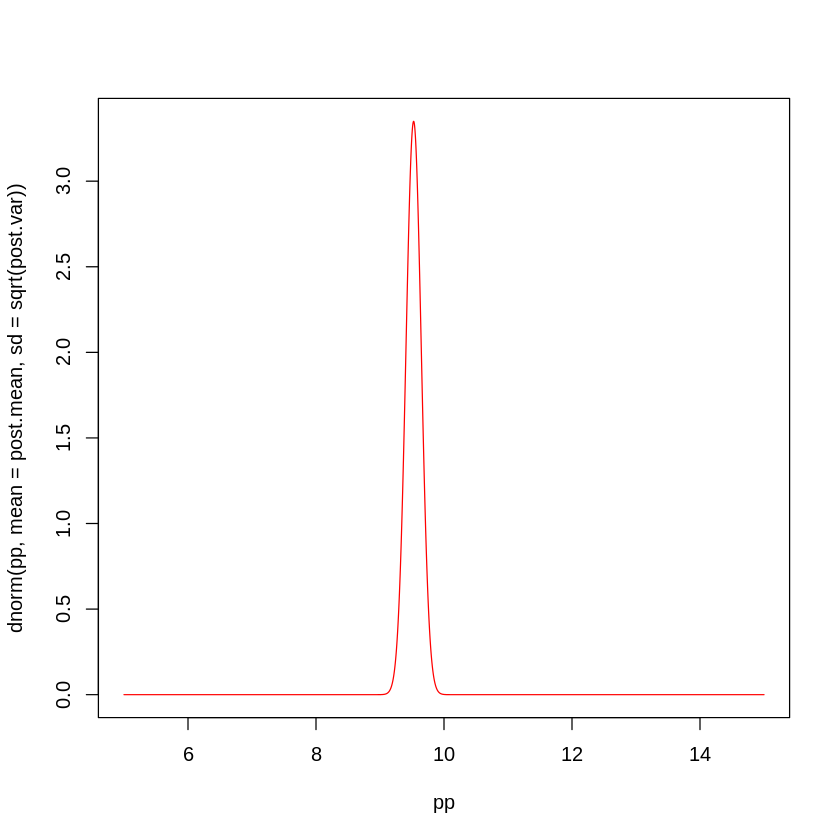

In [27]:
# SECOND DATASET
pc <- pr2 # set the current dataset

n <- length(pc)
pvar <- var(pc)
pmean <- mean(pc)
post.var <- 1/(  prior.var^-1 + n/pvar )
post.mean <- prior.mean*((prior.var^-1)/((n/pvar) + (prior.var^-1)) ) + pmean*(n/pvar)/(n/pvar + (prior.var^-1) )
cat(paste(post.mean, post.var))
mean2 <- post.mean
var2 <- post.var

plot(pp, dnorm(pp, mean=post.mean, sd=sqrt(post.var)), type='l', col='red')

posterior distribution for the mean difference and 95% credibility

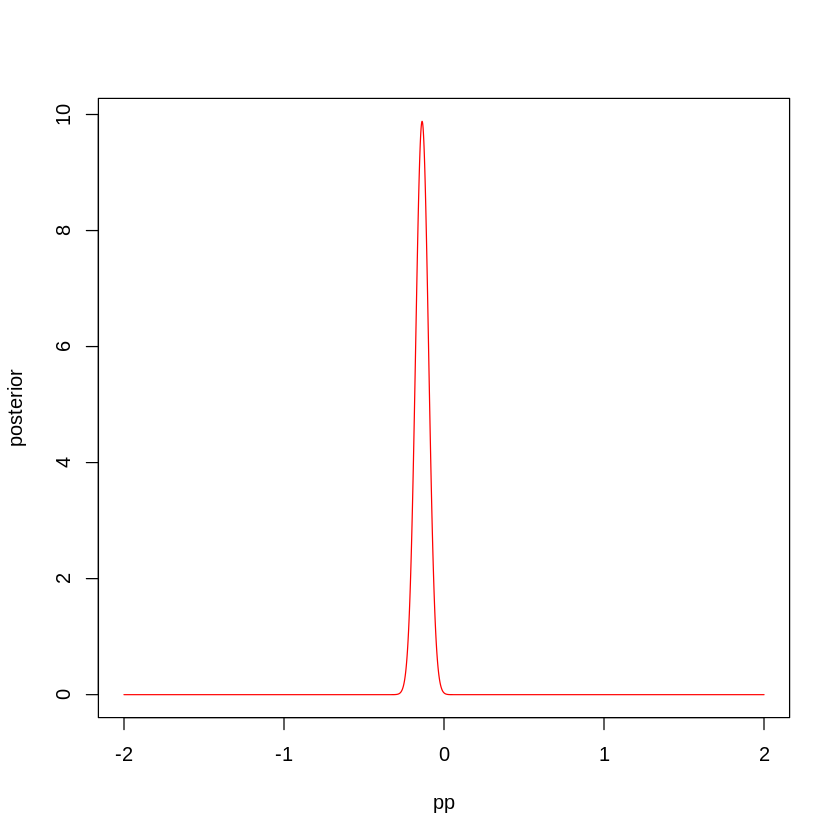

In [30]:
pp <- seq(-2,2,0.001)
posterior <- dnorm(pp, mean1 - mean2, sd = var1 + var2 )
plot(pp, posterior, type='l', col='red')

In [31]:
# credible interval is
dm <-  mean1 - mean2
z_a <- 1

dm - sqrt(var1 + var2)*z_a
dm + sqrt(var1 + var2)*z_a

[1] -0.3378381

[1] 0.06400069

bayesian test on hyp mu1 -mu2 >= 0 at 5%

In [34]:
# just have to integrate
pp <- seq(0,3,0.001)
signif <- sum(0.001*dnorm(pp, mean1 - mean2, sd = var1 + var2 ))
cat(signif)

0.0003632034

Significance is smaller than 0.05, so null hyp is rejected.